# Ein Simulator für Quantenschaltungen

Dominikus Herzberg, V1.0

## Einleitung

Es ist überraschenderweise gar nicht so schwer, einen Simulator für Schaltungen aus Quantengattern zu bauen. Der entscheidende operative Teil des Simulators besteht aus 5 Zeilen Python-Code, es ist die Methode `op` der Klasse `QState`. Diese Kompaktheit ist zum einen dem `numpy`-Paket zu verdanken, das leistungsfähige Operationen zum numerischen Rechnen mit Vektoren und Matrizen zur Verfügung stellt. Mit diesen Ausdrucksmitteln ist man nah an der Mathematik zur Quantenmechanik dran. Zum anderen ist die Kompaktheit ein Zeichen dafür, wie einfach die zugrunde liegenden Prinzipien des Rechnens mit Quanten sind.

### Ein Quantensimulator ist einfach, das Quantenrechnen nicht

Das soll jedoch nicht über zwei Dinge hinwegtäuschen:

1. Das heißt nicht, dass es einfach wäre, die Berechnungen intellektuell nachzuvollziehen. Ganz im Gegenteil, das Quantencomputing bleibt schwer verständlich in den Auswirkungen seiner Rechenprozesse. Die Berechnungsschritte sorgen für eine Verteilung und Verrechnung von Quantenzuständen im Zustandsraum der beteiligten Quantenbits (Qubits). Erst im Moment einer Beobachtung kollabieren die mit den Quantenzuständen assoziierten Qubits zu binären Werten, womit sich auch die Quantenzustände verändern. Es hilft nicht, Beobachtungen zu Zwischenständen vorzunehmen, was in einem Simulator ja geht, weil die Beobachtung einen informationsreichen Zustandsraum auf eine informationsarme binäre Sicht reduziert. Damit ist absolut nichts gewonnen, um die Fortsetzung mit der nächsten Rechenoperation zu verstehen.

2. Der Quantensimulator verdichtet physikalische Realitäten auf eine informatische Sicht, wo es nichts anderes gibt als Quantenbits, den dazu aufgespannten Zustandsraum und Quantenoperatoren. Das Rechnen mit Qubits stellt sich als vollkommen deterministischer, nach strengen Regeln ablaufender Rechenprozess im Zustandsraum dar, der -- und das ist eine Besonderheit -- sogar reversibel ist. Was man dabei leicht aus dem Auge verliert, ist, dass es dazu eine physikalische Interpretation und physikalische Effekte gibt. Zum Beispiel kann man verschränkte Qubits räumlich weit voneinander trennen, sie bleiben dennoch miteinander "verbunden", um es vorsichtig auszudrücken. Sowas kennt man bei klassischen Schaltgliedern nicht. Die Bits, die man miteinander verrechnet, müssen sozusagen sichtbar miteinander verdrahtet sein. Bei verschränkten Qubits bleibt das physikalische Mysterium, wie diese spukhafte Fernwirkung wohl zustande kommen mag. Im Quantensimulator stellt sich die Frage nach dem Ort der Qubits nicht, man verrechnet einfach die Quantenzustände. Ein anderes physikalisches Phänomen bleibt zumindest in einem idealen Quantensimulator unberücksichtigt: die Störeinflüsse, denen Quanten ausgesetzt sind. Ohne Störungen ergibt sich mit jedem Rechenschritt ein klares Bild der Wahrscheinlichkeitsverteilung im Zustandsraum des Quantensystems. In der Realität ist das nicht so. Möchte man der Realität diesbezüglich näher kommen, muss man diese Störungen als Rauschvorgang in dem Modell mit berücksichtigen.

### Qubits sind nur Eingangstore zum Zustandsraum

Ich habe schon mehrfach Quantenbits unterschieden von dem von ihnen aufgespannten Zustandsraum. Das sauber voneinander zu trennen ist der entscheidende Schritt, um einen Quantencomputer zu verstehen. Bei klassischen Bits ist diese Unterscheidung hinfällig. Der Zustand eines Bit-Registers (ein Register ist schlicht eine Folge von Bits) ist an den Bits abzulesen. Nicht so bei den Qubits. Zwar sind die Qubits der Gegenstand von Quantenoperatoren, doch darüber verändert man keine Qubits, sondern den Zustandsraum der Qubits. Oder anders ausgedrückt: Über die Qubits hat man lediglich eine Art Eingangstor zum Zustandsraum. Man wendet die Operatoren bzw. die Quantengatter, wenn man so möchte, nacheinander am Eingangstor an -- einen Ausgang gibt es nicht. Hat man etwa drei Qubits, dann sind damit $2^3 = 8$ Zustände verbunden, die sich gemäß des Operators bzw. Quantengatters ändern. An den Qubits, am Eingang, gibt es nichts zu sehen. Erst wenn man einen Beobachtungsoperator anwendet, geben die Qubits am Eingang einen Zufallswert in Abhängigkeit vom Zustandsraum aus, was gleichzeitig den Zustandsraum verändert.

### Verständniszugang über klassische Bitschaltungen

Um in diese Denke hineinzufinden, betrachten wir zunächst klassische Bitschaltungen als Zustandsraum und definieren dafür Schaltungsoperatoren wie `NOT` und `AND`. Mit binären Schaltungen und Schaltungsgattern ist jede Informatikerin und jeder Informatiker vertraut. Hat man das Denken im Zustandsraum erfasst und den dazugehörigen Python-Code verstanden, ist es faszinierend zu sehen, wie leicht der Übergang zu einem Simulator für Quantenschaltungen ist. Lediglich die Datentypen müssen auf komplexe Zahlen angepasst werden. Voila!

### Die Inspiration zu diesem Text

Die Inspiration zu diesem Notebook hat ein Blogpost von Aws Albarghouthi geliefert. Albarghouthi ist Informatik-Professor an der Universität von Wisconsin-Madison (USA). Ich folge dem Aufbau seines Blogposts, von klassischen Schaltgliedern auszugehen. Sein Python-Code war mir eine große Hilfe, die Vorlage schimmert noch durch. Allerdings habe ich das Design für den Quantensimulator verändert (u.a. finde ich das Method-Chaining eleganter), eine Ausgabe hinzugefügt und die Möglichkeit ergänzt, die Wahrscheinlichkeitsverteilung zu plotten. In den entscheidenden fünf Zeilen Code ist Albarghouthi ein Fehler unterlaufen, den ich behoben habe.

> [Albarghouthi, Aws](https://pages.cs.wisc.edu/~aws/) (2022): A Quantum Circuit Simulator in 27 Lines of Python. Blogpost, 2021-08-05. [online](https://barghouthi.github.io/2021/08/05/quantum/) (Abruf: 2022-04-18)

Da ich Sie gerne ermuntern möchte, diesen Simulator auszubauen und weiterzuentwickeln, habe ich dieses Notebook unter die _Creative Commons_-Lizenz [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/deed.de) gestellt. Kurz gesagt: Sie dürfen die Inhalte bearbeiten und teilen, sofern Sie mich als Urheber nennen, die Verwertung nicht kommerziell ist und Sie das Werk unter die gleiche Lizenzbedingung stellen.

Ich freue mich, wenn Sie mir Korrekturen, Verbesserungen oder Richtigstellungen per Email zusenden. Ebenso sind Vorschläge und Anregungen herzlich willkommen.

-- [Dominikus Herzberg](https://www.thm.de/mni/dominikus-herzberg), Technische Hochschule Mittelhessen

![image](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)

## Ein Simulator für klassische Logikgatter

Im Quantencomputing unterscheidet man die Qubits von dem durch sie aufgespannten Zustandsraum. Weil -- und das ist das Interessante -- Zustände möglich sind, die sich nicht aus einer Kombination der Qubits ableiten lassen. Da soll es also hingehen. Um sich in diese Unterscheidung einzudenken, beginnen wir damit, uns das an klassischen Bits klarzumachen.

### Ein Register aus $n$ Bits hat $2^n$ Zustände

Ein klassisches Bit, so wie wir es aus der Informatik kennen, hat entweder den Wert 0 oder den Wert 1. Ein Register aus $n$ Bits hat $2^n$ Zustände; dieser Zustandsraum setzt sich zusammen aus allen möglichen Wertkombinationen für diese Bits, d.h. den Binärwerten von 0 bis $2^n - 1$. Die aufgeführten Register aus $n$ Bits haben die folgenden Zustandsräume:

* $n = 1$: 0, 1
* $n = 2$: 00, 01, 10, 11
* $n = 3$: 000, 001, 010, 011, 100, 101, 110, 111
* usw.

In etwas ungewöhnlicher Weise kann man diesen Zustandsraum durch einen Vektor darstellen, wobei jede Position im Vektor einem binären Wert entspricht. Durch eine 1 wird markiert, welchen Binärwert der Zustandsvektor repräsentiert. Im Beispiel für $n = 2$ zeigt der Vektor den binären Wert `10`, dh. 2 an. Das ist der dritte Wert von oben:

$$
\begin{matrix}00\quad\rightarrow\quad\\
              01\quad\rightarrow\quad\\
              10\quad\rightarrow\quad\\
              11\quad\rightarrow\quad\end{matrix}
\begin{pmatrix}0 \\ 0 \\ 1 \\ 0\end{pmatrix}
$$

In Python kann man einen solchen Vektor mit Hilfe des Pakets zum numerischen Rechnen namens `numpy` erstellen. Es wird ein Vektor mit $2^2$ (in Python `2**2`) Null-Werten aufgesetzt; die Werte sind Ganzzahl-Typen (_integer_) und werden intern mit 32 Bit kodiert.

Doch zunächst muss das `numpy`-Paket importiert werden. Es ist üblich, es unter der Abkürzung `np` einzubinden.

In [81]:
import numpy as np

In [82]:
bitstates = np.zeros(2**2, dtype = np.int32)
bitstates[2] = 1
bitstates

array([0, 0, 1, 0], dtype=int32)

Sie ahnen vielleicht, wie man mit dieser Notation vollkommen irrwitzige Zustände für ein Bitregister aufsetzen kann. Wenn beispielsweise alle Werte im Zustandsvektor 0 sind, oder wenn sich mehrere Zustandswerte überlagern. Bei Qubits spielt das tatsächlich eine Rolle, bei klassischen Bits geht das natürlich nicht.

Gießen wir die Erzeugung eines solchen Zustandsraums in Code. Die Klasse `CState` (das `C` steht für _classical_) bekommt zur Initialisierung eines Zustandsobjekts die Anzahl der Bits als `n` übergeben.

In [83]:
class CState:
    def __init__(self, n):
        self.n = n
        self.state = np.zeros(2**self.n, dtype=np.int32)
        self.state[0] = 1 # Initialisierung auf Wert 0

CState(3).state

array([1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### Das `NOT`-Gatter für ein 1-Bit-Register

Ein `NOT`-Schaltglied arbeitet auf einem Bit. Es genügt, sich ein 1-Bit-Register zu veranschaulichen mit einem Vektor für die zwei Zustände, die den Werten 0 und 1 zugeordnet sind, hier $a$ und $b$. Entweder ist $a = 1$ und $b = 0$, oder es ist $a = 0$ und $b = 1$. Andere Kombinationen von $a$ und $b$ kann es nicht geben. 

$$
\begin{matrix}0\quad\rightarrow\quad\\
              1\quad\rightarrow\quad\\
\end{matrix}
\begin{pmatrix}a \\ b\end{pmatrix}
$$

Die `NOT`-Operation besteht darin, den Zustandsvektor $\begin{pmatrix}1 \\ 0\end{pmatrix}$ in $\begin{pmatrix}0 \\ 1\end{pmatrix}$ bzw. den Zustandsvektor $\begin{pmatrix}0 \\ 1\end{pmatrix}$ in $\begin{pmatrix}1 \\ 0\end{pmatrix}$ zu überführen. Oder allgemeiner: Ein `NOT` wandelt den Zustand $\begin{pmatrix}a \\ b\end{pmatrix}$ in den Zustand $\begin{pmatrix}b \\ a\end{pmatrix}$; vergessen Sie dabei nicht: die Zustände $\begin{pmatrix}0 \\ 0\end{pmatrix}$ und $\begin{pmatrix}1 \\ 1\end{pmatrix}$ sind ungültige Zustände.

Das `NOT`-Schaltglied lässt sich als Matrix darstellen und die `NOT`-Operation als die Multiplikation der Matrix mit dem Zustandsvektor. Es ergibt sich ein Ergebnisvektor, bei dem $a$ und $b$ die Plätze getauscht haben, wie das Rechenbeispiel belegt.

$$
\begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}
\cdot
\begin{pmatrix}a \\ b\end{pmatrix}
=
\begin{pmatrix}0\cdot a + 1\cdot b \\ 1\cdot a + 0\cdot b\end{pmatrix}
=
\begin{pmatrix}b \\ a\end{pmatrix}
$$

In Python stellt sich das wie folgt dar; da links von dem `@`-Zeichen eine Matrix steht, steht `@` für die Matrizenmultiplikation.

In [84]:
NOT = np.array([[0, 1], [1, 0]])
NOT @ CState(1).state

array([0, 1])

In [85]:
NOT @ NOT @ CState(1).state

array([1, 0])

### `NOT` im 2-Bit-Register

Das war `NOT` angewendet auf ein 1-Bit-Register. Wenn sich `NOT` auf das erste und/oder zweite Bit in einem 2-Bit-Register beziehen soll, dann braucht es etwas Matrizen-Magie, um eine entsprechende 4x4-Matrix aus der 2x2-Matrix $\begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}$ für das `NOT` vorzubereiten. Das geht mit Hilfe der Identitätsmatrix und des Kronecker-Produkts.

Warum es bei einem 2-Bit-Register einer 4x4-Matrix bedarf? Weil ein 2-Bit-Register einen Zustandsvektor der Größe 4 hat, der die vier möglichen Werte abbildet. Insofern muss die Matrix 4x4 Werte haben, damit sich bei der Multiplikation wieder ein Zustandsvektor der Größe 4 ergibt. Lineare Algebra, Sie erinnern sich? ;-)

#### Die Identitätsmatrix verhält sich neutral

Machen wir uns zunächst klar, dass die Identitätsmatrix den Zustandsvektor nicht verändert; daher auch ihr Name.

In [86]:
op0 = np.eye(4, dtype=np.int32) # Eine Identitätsmatrix der Größe 4
op0

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int32)

In [87]:
# Die Identitätsmatrix verhält sich neutral; nichts passiert
print(op0 @ np.array([1, 0, 0, 0])) # 00 [1, 0, 0, 0] -> 00 [1, 0, 0, 0]
print(op0 @ np.array([0, 1, 0, 0])) # 01 [0, 1, 0, 0] -> 01 [0, 1, 0, 0]
print(op0 @ np.array([0, 0, 1, 0])) # 10 [0, 0, 1, 0] -> 10 [0, 0, 1, 0]
print(op0 @ np.array([0, 0, 0, 1])) # 11 [0, 0, 0, 1] -> 11 [0, 0, 0, 1]

[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]


#### Erstes Bit auf `NOT`

Wenn sich das `NOT` in einem 2-Bit-Register nur auf das erste Bit auswirken soll, muss irgendwie die `NOT`-Matrix (2x2) für das erste Bit mit einer Identitätsmatrix (2x2) für das zweite Bit zu einer 4x4-Matrix verrechnet werden. Genau das leistet das sogenannte Konecker-Produkt zweier Matrizen. Das [Beispiel auf Wikipedia](https://de.wikipedia.org/wiki/Kronecker-Produkt#Beispiel) (Abruf: 2022-04-19) macht einem die Funktionsweise intuitiv klar. Angewendet auf unser Beispiel sieht das wie folgt aus:

$$
NOT \otimes I_2 = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}\otimes \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}
=\begin{pmatrix} 
0 \cdot \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} & 1 \cdot \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \\\\
1 \cdot \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} & 0 \cdot \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}
\end{pmatrix}
=\begin{pmatrix} 0 & 0 & \!\!\! & 1 & 0 \\ 0 & 0 & \!\!\! & 0 & 1 \\[0.6em] 1 & 0 & \!\!\! & 0 & 0 \\ 0 & 1 & \!\!\! & 0 & 0\end{pmatrix}
$$

In [88]:
op1 = np.kron(NOT, np.eye(2, dtype=np.int32)) # 2 Bits, erstes NOT
op1

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0]])

Überzeugen Sie sich selbst, dass die vier möglichen Fälle allesamt korrekt abgehandelt werden.

In [89]:
# Erstes Bit wird durch NOT invertiert
print(op1 @ np.array([1, 0, 0, 0])) # 00 [1, 0, 0, 0] -> 10 [0, 0, 1, 0]
print(op1 @ np.array([0, 1, 0, 0])) # 01 [0, 1, 0, 0] -> 11 [0, 0, 0, 1]
print(op1 @ np.array([0, 0, 1, 0])) # 10 [0, 0, 1, 0] -> 00 [1, 0, 0, 0]
print(op1 @ np.array([0, 0, 0, 1])) # 11 [0, 0, 0, 1] -> 01 [0, 1, 0, 0]


[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]


#### Zweites Bit auf `NOT`

**Aufgabe**: Rechnen Sie per Hand das Kronecker-Produkt $I_2 \otimes NOT$ aus und vollziehen Sie die nachstehenden Codezeilen nach.

In [90]:
op2 = np.kron(np.eye(2, dtype=np.int32), NOT) # 2 Bits, zweites NOT
op2

array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [91]:
# Zweites Bit wird durch NOT invertiert
print(op2 @ np.array([1, 0, 0, 0])) # 00 [1, 0, 0, 0] -> 01 [0, 1, 0, 0]
print(op2 @ np.array([0, 1, 0, 0])) # 01 [0, 1, 0, 0] -> 00 [1, 0, 0, 0]
print(op2 @ np.array([0, 0, 1, 0])) # 10 [0, 0, 1, 0] -> 11 [0, 0, 0, 1]
print(op2 @ np.array([0, 0, 0, 1])) # 11 [0, 0, 0, 1] -> 10 [0, 0, 1, 0]

[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]


#### Erstes und zweites Bit auf `NOT`

Sehen Sie, wie $NOT \otimes NOT$ in der ergebenden Matrix ein `NOT` im `NOT` abbildet? Man braucht für die Rechnung kein Papier und Stift. Vollziehen Sie auch hier die Ausführungen eigenständig nach.

In [92]:
op3 = np.kron(NOT, NOT) # 2 Bits, erstes und zweites Bit NOT
op3

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

Alternativ hätte man `op3` auch so, nämlich als $(NOT \otimes I_2) \cdot (I_2 \otimes NOT)$ ermitteln können:

In [93]:
op1 @ op2

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [94]:
# Erstes und zweites Bit werden durch NOT invertiert
print(op3 @ np.array([1, 0, 0, 0])) # 00 [1, 0, 0, 0] -> 11 [0, 0, 0, 1]
print(op3 @ np.array([0, 1, 0, 0])) # 01 [0, 1, 0, 0] -> 10 [0, 0, 1, 0]
print(op3 @ np.array([0, 0, 1, 0])) # 10 [0, 0, 1, 0] -> 01 [0, 1, 0, 0]
print(op3 @ np.array([0, 0, 0, 1])) # 11 [0, 0, 0, 1] -> 00 [1, 0, 0, 0]

[0 0 0 1]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]


### `NOT` im 3-Bit-Register

Bei einem 3-Bit-Register wird es ein wenig interessanter. Letztlich sieht man bestätigt, was sich bereits beim 2-Bit-Register gezeigt hat.

#### Drittes Bit auf `NOT`

Nun gilt es $I_2 \otimes I_2 \otimes NOT$ zu berechnen. Oder kürzer: $I_4 \otimes NOT$.

In [95]:
op4 = np.kron(np.eye(4, dtype=np.int32), NOT) # 2 bits first, 3rd bit
print(op4 @ np.array([1,0,0,0,0,0,0,0])) # 000 -> 001
print(op4 @ np.array([0,1,0,0,0,0,0,0])) # 001 -> 000
print(op4 @ np.array([0,0,1,0,0,0,0,0])) # 010 -> 011
print(op4 @ np.array([0,0,0,1,0,0,0,0])) # 011 -> 010
print(op4 @ np.array([0,0,0,0,1,0,0,0])) # 100 -> 101
print(op4 @ np.array([0,0,0,0,0,1,0,0])) # 101 -> 100
print(op4 @ np.array([0,0,0,0,0,0,1,0])) # 110 -> 111
print(op4 @ np.array([0,0,0,0,0,0,0,1])) # 111 -> 110
op4

[0 1 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 0 0]
[0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 1 0]


array([[0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0]])

#### Zweites Bit auf `NOT`

In diesem Beispiel steht das `NOT` in der Mitte zweier Identitätsmatrizen: $I_2 \otimes NOT \otimes I_2$

In [96]:
op5 = np.kron(np.kron(np.eye(2, dtype=np.int32), NOT), np.eye(2, dtype=np.int32))
print(op5 @ np.array([1,0,0,0,0,0,0,0])) # 000 -> 010
print(op5 @ np.array([0,1,0,0,0,0,0,0])) # 001 -> 011
print(op5 @ np.array([0,0,1,0,0,0,0,0])) # 010 -> 000
print(op5 @ np.array([0,0,0,1,0,0,0,0])) # 011 -> 001
print(op5 @ np.array([0,0,0,0,1,0,0,0])) # 100 -> 110
print(op5 @ np.array([0,0,0,0,0,1,0,0])) # 101 -> 111
print(op5 @ np.array([0,0,0,0,0,0,1,0])) # 110 -> 100
print(op5 @ np.array([0,0,0,0,0,0,0,1])) # 111 -> 101
op5

[0 0 1 0 0 0 0 0]
[0 0 0 1 0 0 0 0]
[1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1]
[0 0 0 0 1 0 0 0]
[0 0 0 0 0 1 0 0]


array([[0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0]])

### Der Simulator-Code für Logikgatter

Wir übernehmen den obigen Code von `CState`, namentlich die Methode `__init__`, und ergänzen eine Methode `op` für _operation_. Diese Methode nimmt eine Matrix als Operanden entgehen. Aus den obigen Beobachtungen schließen wir verallgemeinernd, dass Matrizen nicht nur auf einem Bit in dem Zustandsraum operieren können (in dem Fall ist eine 2x2-Matrix erforderlich, wie bei `NOT`), sondern dass das auch auf zwei oder mehr aufeinanderfolgenden Bits möglich ist mit ensprechend größeren Matrizen (4x4, 8x8, 16x16 usw.). Mit dem Parameter `i` kann angegeben werden, ab welchem Anfangsbit die Matrix angewendet wird. Die Zählung beginnt mit 0, wie das so üblich ist in der Informatik.

Im allgemeinen Fall gibt es eine linke und eine rechte Identitätsmatrix, `eyeL` und `eyeR`, und dazwischen die Matrix (`operator`). Die einzige Schwierigkeit besteht darin, die Größen der Identitätsmatrizen korrekt zu berechnen. Dafür bedarf es der Logarithmus-Funktion zur Basis 2, weshalb die `math`-Bibliothek zunächst zu importieren ist.

Die Methode `__repr__` bietet eine auskunftsreichere Repräsentation von `CState`-Objekten an.

In [97]:
import math

In [98]:
class CState:
    def __init__(self, n):
        self.n = n
        self.state = np.zeros(2**n, dtype=np.int32)
        self.state[0] = 1 # Initialisierung auf Wert 0
    def op(self, operator, i = 0):
        eyeL = np.eye(2**i, dtype=np.int32)
        eyeR = np.eye(2**(self.n - i - int(math.log(operator.shape[0], 2))), dtype=np.int32)
        self.state = np.kron(np.kron(eyeL, operator), eyeR) @ self.state
        return self
    def __repr__(self):
        return "%s(%s): %s" % (self.__class__.__name__, self.n, self.state)

In [99]:
CState(2)

CState(2): [1 0 0 0]

### Definition eines `AND`-Gatters

Nachfolgend ist ein `AND` definiert. Gewöhnlicherweise kennen Sie das `AND`-Schaltglied als eines, das zwei Bit-Eingänge verarbeitet und einen Bit-Ausgang mit dem Ergebnis hat. Hier ist ein wenig anders vorzugehen. Sie betrachten ein zwei Bit-Register, d.h. vor und nach der Anwendung einer Operation liegen nachwievor zwei Bits vor. Die Anzahl der Bits ändert sich nicht. Man muss sich also darauf einigen, auf welches der beiden Bits das Ergebnis gespielt wird und wie mit dem anderen Bit zu verfahren ist; man kann es beispielsweise unverändert lassen.

**Aufgabe**: Schauen Sie sich an, wie das hier definierte `AND`-Gatter funktioniert und beschreiben Sie seine Funktionsweise.

In [100]:
AND = np.array([[1,0,1,0],[0,1,0,0],[0,0,0,0],[0,0,0,1]], dtype=np.int32)
AND

array([[1, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1]], dtype=int32)

Mit dem `NOT`-Operator kann man jedes Bit auf einen gewünschten Wert setzen. Zur Erinnerung: Die `op`-Methode erlaubt die Angabe, auf welches Bit sich die Anwendung eines Operators bezieht.

Wie Sie sehen, entwickle ich den Schaltungsaufbau anhand vier separater Ausdrücke, die die Schaltungsfolge des vorhergehenden Ausdrucks aufreifen und erweitern. Man muss sich daran gewöhnen, wie die Eins im Zustandsvektor lediglich hin- und herhüpft, um den aktuellen Zustand des Quantenregisters abzubilden.

In [101]:
print(CState(2)) # Initialized to 00
print(CState(2).op(NOT)) # First bit fliped: 10
print(CState(2).op(NOT).op(NOT,1)) # Second bit flipped: 11
print(CState(2).op(NOT).op(NOT,1).op(AND)) # AND on both: 11

CState(2): [1 0 0 0]
CState(2): [0 0 1 0]
CState(2): [0 0 0 1]
CState(2): [0 0 0 1]


**Aufgabe**: Definieren Sie ein `ODER`-Gatter, welches das Ergebnis in das gleiche Bit wie `AND` überträgt. Zeigen Sie zusammen mit einem `NOT` auf, dass das `ODER`-Gatter funktioniert.

## Simulator für Quantenschaltungen

Sie haben bis hierher tapfer durchgehalten. Jetzt kommt das eigentlich Ungeheuerliche und irgendwie auch Faszinierende: Wir müssen in dem Code für `CState` lediglich das `dtype=int32` auf `dtype=complex` anpassen, also komplexe Zahlenwerte zulassen, ... und der Simulator für Quantenschaltungen ist fertig! Natürlich braucht es dazu noch Quantengatter, die ebenfalls Matrizen sind, aber eben mit komplexen Zahlenwerten.

Aus diesem Grund importieren wir wie gehabt `math`, ein paar Methoden aus `cmath` für komplexe Zahlen und zudem `matplotlib.pyplot`, um den Zustandsraum mit den jewiligen Zustands-Wahrscheinlichkeiten zu visualisieren.


In [102]:
from cmath import isclose, phase, pi
import math
import matplotlib.pyplot as plt

### Der Simulator-Code

Qubits werden als $|0\rangle$ bzw. $|1\rangle$ dargestellt. Ein Quantenregister aus $n=3$ Qubits hat -- wie im klassischen Fall -- einen Zustandsraum von $2^n$ Werten und zwar: $|000\rangle$, $|001\rangle$, $|010\rangle$, $|011\rangle$, $|100\rangle$, $|101\rangle$, $|110\rangle$, $|111\rangle$.

Konnte eben noch der klassische Zustandsvektor lediglich eine einzige Eins beheimaten, sind nun Quantengatter in Matrizenform erlaubt, die Werte im Zustandsraum verteilen. Die Summe der Betragsquadrate von den Zustandswerten im Zustandsraum muss exakt 1 ergeben. Das prüft übrigens die Methode `isvalid` im Code.

Eine Matrix operiert wie bei den Logikgattern auf einem oder mehr Qubits. Wenn eine Matrix $k$ Quibits adressiert, dann hat die Matrix die Größe $2^k \times 2^k$. Die Matrix muss eine [unitäre Matrix](https://de.wikipedia.org/wiki/Unit%C3%A4re_Matrix) sein. Das überprüft der Code nicht.

Der sonstige Code, der hinzugekommen ist, hat für die Simulation keine weitere Funktion, sondern dient nur zu Darstellungszwecken:

Die Methode `__repr__` ist angepasst, um Einblicke in den Zustandsvektor zu gewähren: die komplexen Zahlen eines Zustands werden in voller Genauigkeit in kartesischen Koordination angegeben und ergänzt um eine gerundete Darstellung in Polarkoordinaten. Der Polarwinkel ist in Grad angegeben, da das meist leichter zu interpretieren ist. Zusätzlich wird die Wahrscheinlichkeit für den Zustand angegeben.

Die Methode `show` erlaubt ein `print` eines `QState`-Objekts (dafür wird `__repr__` bemüht), ohne damit das [Method-Chaining](https://en.wikipedia.org/wiki/Method_chaining) zu unterbrechen. Es ist eines Design-Entscheidung von mir, mit Method-Chaining zu arbeiten.

Die Methode `plot` erstellt ein Balkendiagramm zur Wahrscheinlichkeitsverteilung der Zustände im Zustandsvektor.

In [103]:
class QState:
    def __init__(self, n):
        self.n = n
        self.state = np.zeros(2**n, dtype=complex)
        self.state[0] = 1 # Initialisierung auf Wert 0
    
    def op(self, operator, i = 0):
        eyeL = np.eye(2**i, dtype=complex)
        eyeR = np.eye(2**(self.n - i - int(math.log(operator.shape[0], 2))), dtype=complex)
        self.state = np.kron(np.kron(eyeL, operator), eyeR) @ self.state
        return self
    
    def isvalid(self):
        return isclose(self.state @ np.conjugate(self.state), 1.0)
    
    def __repr__(self):
        repr = f"{self.__class__.__name__}({self.n}) valid = {self.isvalid()}:"
        for i in range(0, self.state.shape[0]):
            num = self.state[i]
            repr += f"\n{i:2d} |{i:0{self.n}b}⟩ "
            repr += f"{num.real if isclose(num.imag, 0.0) else (f'{num.imag}i' if isclose(num.real, 0.0) else f'{num.real} + {num.imag}i')} "
            repr += f"({abs(num):.4f} * e^{phase(num) / pi * 180.0:.2f}°) "
            repr += f"{abs(num * num):.2%}"
        return repr
    
    def show(self):
        print(self)
        return self
    
    def plot(self):
        names = list(map(lambda x: f'|{x}⟩', range(0, self.state.shape[0])))
        values = list(map(lambda x: abs(x), self.state * self.state))
        plt.bar(names, values)
        plt.suptitle(f'{self.__class__.__name__}({self.n})')
        plt.show()
        return self

### Spezial-Operator `SWAP`

Um die Methode `op` einfach zu halten, gibt man für einen Operator an, von welchem Bit an er wirkt. Natürlich passt das nicht immer. Manchmal arbeitet ein Operator bzw. ein Quantengatter beispielsweise auf zwei Qubits, die aber nicht hintereinander aufgereiht sind. Mit `SWAP` kann man zwei aufeinander folgende Qubits tauschen und sich so die Qubit-Folge geeignet arrangieren. Das ist zwar etwas mühsam, aber derzeit der Preis für eine so kurze `op`-Methode.  

In [104]:
SWAP = np.array([[1,0,0,0],
                 [0,0,1,0],
                 [0,1,0,0],
                 [0,0,0,1]])
SWAP

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

### Quantengatter

Die implementierten Quantengatter orientieren sich an der [Liste der Quantengatter](https://de.wikipedia.org/wiki/Liste_der_Quantengatter) aus Wikipedia. Schaltungen werden mit diesen Quantengattern realisiert.

In [105]:
CNOT = np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,0,1],
                 [0,0,1,0]])
CNOT

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [106]:
S = np.array([[1,0],
              [0,1j]])
S

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

In [107]:
inv_sqrt2 = 1 / 2**0.5 # 1 durch Wurzel aus Zwei
T = np.array([[1,0],
              [0, inv_sqrt2 + inv_sqrt2 * 1j]])
T

array([[1.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.70710678+0.70710678j]])

In [108]:
H = inv_sqrt2 * np.array([[1, 1],
                          [1,-1]])
H

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [109]:
PAULIX = np.array([[0,1],
                   [1,0]])
PAULIX

array([[0, 1],
       [1, 0]])

In [110]:
PAULIY = np.array([[0,0-1j],
                [0+1j,0]])
PAULIY

array([[0.+0.j, 0.-1.j],
       [0.+1.j, 0.+0.j]])

In [111]:
PAULIZ = np.array([[1,0],
                   [0,-1]])
PAULIZ

array([[ 1,  0],
       [ 0, -1]])

In [112]:
XROT = inv_sqrt2 * np.array([[1,0-1j],[0-1j,1]])
XROT

array([[0.70710678+0.j        , 0.        -0.70710678j],
       [0.        -0.70710678j, 0.70710678+0.j        ]])

In [113]:
YROT = inv_sqrt2 * np.array([[1,-1],[1,1]])
YROT

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [114]:
TOFFOLI = np.array([[1,0,0,0,0,0,0,0],
                    [0,1,0,0,0,0,0,0],
                    [0,0,1,0,0,0,0,0],
                    [0,0,0,1,0,0,0,0],
                    [0,0,0,0,1,0,0,0],
                    [0,0,0,0,0,1,0,0],
                    [0,0,0,0,0,0,0,1],
                    [0,0,0,0,0,0,1,0]])
TOFFOLI

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0]])

## Simulationsbeispiel

In dem nachfolgenden Beispiel sehen Sie den Simulator für Quantenschaltungen in Aktion.

### ERP-Paar

Die Quantentheorie hat zur Zeit ihrer Entstehung (oder sollte man eher sagen: ihrer Entdeckung?) die größten Physiker herausgefordert. Das tut sie übrigens immer noch. Albert Einstein wollte damals den Beweis antreten, dass etwas mit der Quantentheorie nicht stimmt. Zusammen mit Boris Podolsky und Nathan Rosen veröffentlichte er 1935 einen Artikel dazu. Darin spielt ein Quantenzustand eine Rolle, der ihnen zu Ehren als ERP-Paar und bisweilen auch als Bell-Zustand bezeichnet wird. Einstein und seine Kollegen argumentierten, dass die Verschränkung zweier Quanten gegen das Lokalitätsprinzip verstößt -- und deshalb die Quantentheorie fehlerhaft sei. Sie hatten unrecht mit der Folgerung. Die Quantentheorie ist korrekt, sie ist die wohl am besten experimentell bestätigte Theorie der Physik. Es ist ihre Besonderheit, dass sie gegen das Lokalitätsprinzip verstoßen kann, und das ist die neue Erkenntnis. Wie man sich das vorstellen und erklären soll, das verrät einem die Quantentheorie leider nicht.

Es ist einfach, mit dem Simulator ein ERP-Paar bzw. einen [Bell-Zustand](https://en.wikipedia.org/wiki/Bell_state) zu erzeugen. Am Ende hat man ein verschränktes Quantenpaar.

Wenn Sie diese erste Simulation sehen, dann können Sie das vielleicht rein rechnerisch nachvollziehen, aber so richtig verstehen und deuten können Sie das ohne weitere Kenntnisse des Quantencomputings vermutlich nicht. Es sei an die Einleitung erinnert: Nur weil man mit einem Quantensimulator arbeitet hat man die Quantenwelt noch lange nicht verstanden. Willkommen im Club!

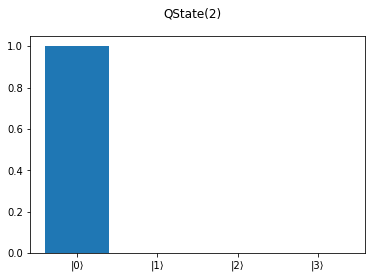

QState(2) valid = True:
 0 |00⟩ 1.0 (1.0000 * e^0.00°) 100.00%
 1 |01⟩ 0.0 (0.0000 * e^0.00°) 0.00%
 2 |10⟩ 0.0 (0.0000 * e^0.00°) 0.00%
 3 |11⟩ 0.0 (0.0000 * e^0.00°) 0.00%


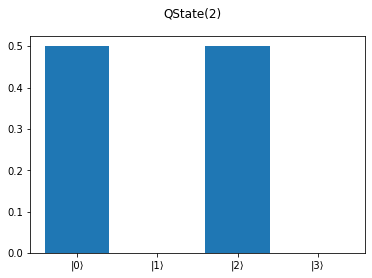

QState(2) valid = True:
 0 |00⟩ 0.7071067811865475 (0.7071 * e^0.00°) 50.00%
 1 |01⟩ 0.0 (0.0000 * e^0.00°) 0.00%
 2 |10⟩ 0.7071067811865475 (0.7071 * e^0.00°) 50.00%
 3 |11⟩ 0.0 (0.0000 * e^0.00°) 0.00%


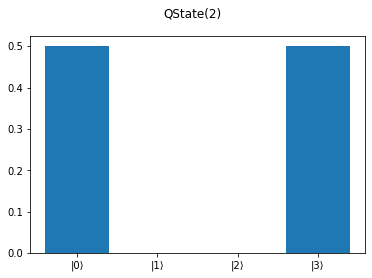

QState(2) valid = True:
 0 |00⟩ 0.7071067811865475 (0.7071 * e^0.00°) 50.00%
 1 |01⟩ 0.0 (0.0000 * e^0.00°) 0.00%
 2 |10⟩ 0.0 (0.0000 * e^0.00°) 0.00%
 3 |11⟩ 0.7071067811865475 (0.7071 * e^0.00°) 50.00%

In [115]:
QState(2).plot().show().op(H).plot().show().op(CNOT).plot()

## Erweiterungen

Eventuell werde ich den Code mit der Zeit selber erweitern. Kommen Sie mir gerne zuvor. Hier ein paar Anregungen:

* Der Code benötigt noch einige exemplarische Beispiele als Testfälle
* Anzeige, welche Bits miteinander verschränkt sind.
* Freie Konfiguration der Bits zu einem Operator, bspw. `QState(4).op(CNOT,1,3)` oder `QState(4).op(CNOT,3,0)`; das erste Bit gibt das Control-Bit, das zweite das Target-Bit an.
* Messung von Quantenbits ergänzen
* Rauschmodell berücksichtigen

*Hinweis*: Zum Verständnis der Methode `__repr__` in `QState` mögen folgende Quellen hilfreich sein:

* Format-Templates, siehe [Python-Doku](https://docs.python.org/3/library/string.html#format-string-syntax) (Abruf: 2022-04-18)
* Formatierung einer Binärzahl, siehe [Stackoverflow](https://stackoverflow.com/questions/16926130/convert-to-binary-and-keep-leading-zeros) (Abruf: 2022-04-18)

